**Implémentation du TD2 (analyse spectrale):**

les bibliothèques nécessaires:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(frequencies, amplitudes, title, x_limit=20000):
    plt.figure(figsize=(10, 4))
    plt.stem(frequencies, amplitudes, basefmt=" ")
    plt.title(title)
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xlim(-500, x_limit)
    plt.show()

- Exercice 1:

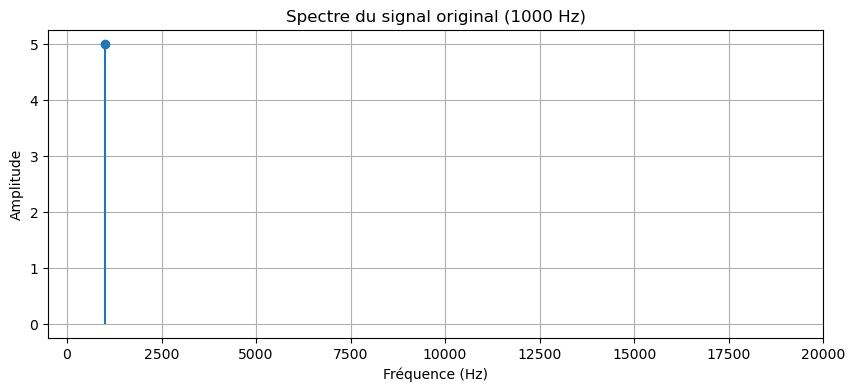

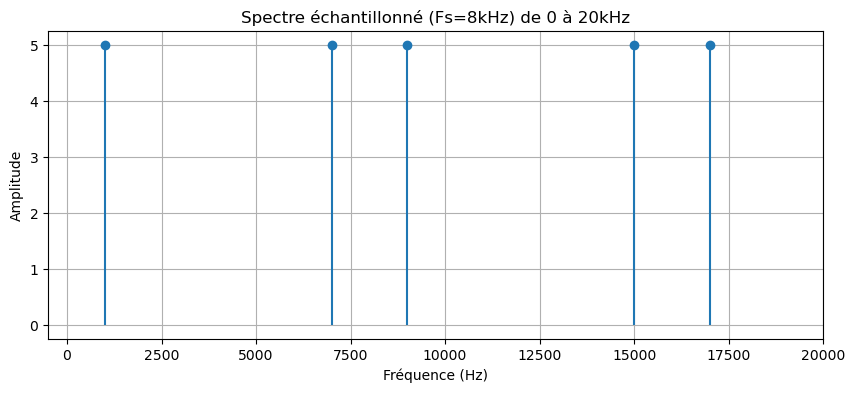

In [4]:
# a. Spectre du signal original (Analogique)
# Une raie à 1000 Hz avec une amplitude de 5 (ou 2.5 en bilatéral)
plot_spectrum([1000], [5], "Spectre du signal original (1000 Hz)")

# b. Spectre du signal échantillonné (0 à 20 kHz)
# Les répliques apparaissent à k*Fs ± f0
fs = 8000
f0 = 1000
k_values = np.arange(0, 4) # Pour couvrir jusqu'à 20kHz
sampled_freqs = []
for k in k_values:
    sampled_freqs.append(k*fs + f0)
    sampled_freqs.append(abs(k*fs - f0))

sampled_freqs = sorted(list(set(sampled_freqs)))
amplitudes = [5] * len(sampled_freqs)
plot_spectrum(sampled_freqs, amplitudes, "Spectre échantillonné (Fs=8kHz) de 0 à 20kHz", 20000)

- Exercice 2:

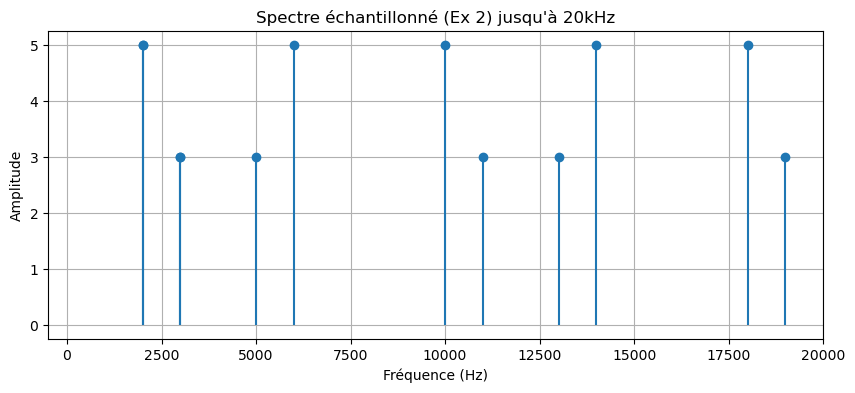

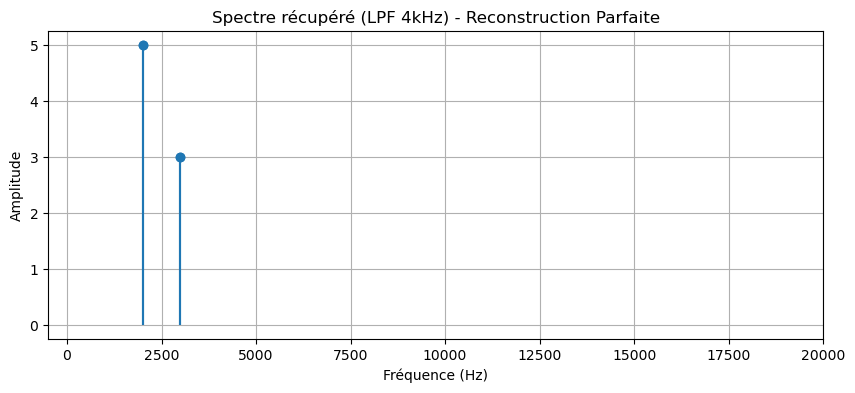

In [5]:
fs = 8000
freqs_orig = [2000, 3000]
amps_orig = [5, 3]

# a. Spectre échantillonné jusqu'à 20 kHz
sampled_freqs = []
sampled_amps = []
for k in range(4):
    for f, a in zip(freqs_orig, amps_orig):
        f_plus = k*fs + f
        f_moins = abs(k*fs - f)
        if f_plus <= 20000:
            sampled_freqs.append(f_plus); sampled_amps.append(a)
        if f_moins <= 20000:
            sampled_freqs.append(f_moins); sampled_amps.append(a)

plot_spectrum(sampled_freqs, sampled_amps, "Spectre échantillonné (Ex 2) jusqu'à 20kHz")

# b. Signal récupéré avec LPF (Cutoff = 4 kHz)
# On ne garde que les fréquences < 4000 Hz
recovered_f = [f for f in sampled_freqs if f < 4000]
recovered_a = [a for f, a in zip(sampled_freqs, sampled_amps) if f < 4000]
plot_spectrum(recovered_f, recovered_a, "Spectre récupéré (LPF 4kHz) - Reconstruction Parfaite")

- Exercice 3 (Aliasing):

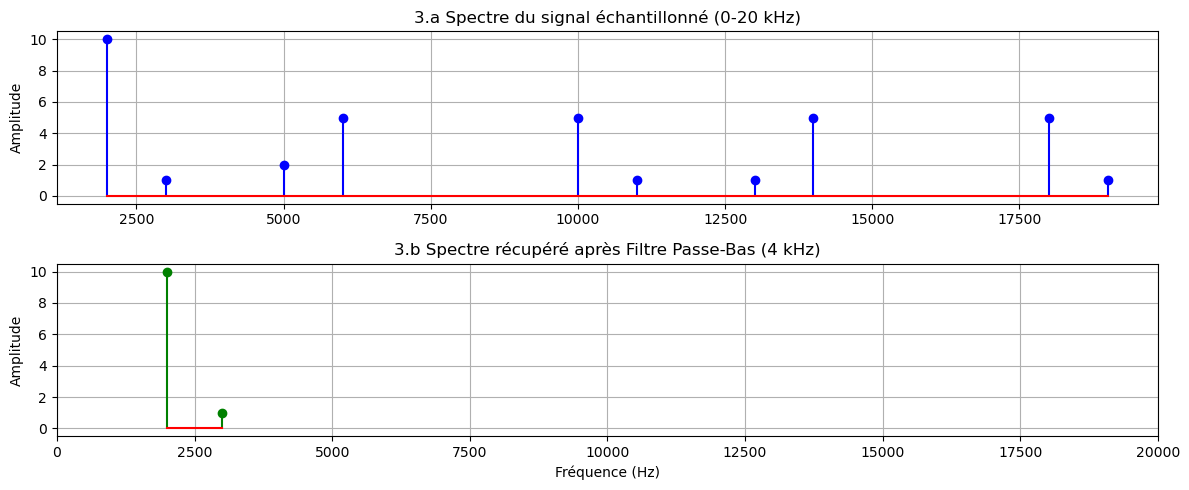

Observation : La fréquence de 5000 Hz a été repliée à |8000 - 5000| = 3000 Hz.
Le signal récupéré contient donc 2000 Hz et 3000 Hz (au lieu de 5000 Hz).


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de l'exercice 3
fs = 8000          # Fréquence d'échantillonnage
f_cutoff = 4000    # Coupure du filtre passe-bas idéal
f1, a1 = 2000, 5   # Composante 1
f2, a2 = 5000, 1   # Composante 2

# --- a. Spectre du signal échantillonné jusqu'à 20 kHz ---
sampled_freqs = []
sampled_amps = []

# Génération des répliques : k*Fs +/- f
for k in range(4): # k=0, 1, 2, 3 pour couvrir jusqu'à 20kHz
    for f, a in [(f1, a1), (f2, a2)]:
        f_plus = k * fs + f
        f_moins = np.abs(k * fs - f)
        
        if f_plus <= 20000:
            sampled_freqs.append(f_plus); sampled_amps.append(a)
        if f_moins <= 20000:
            sampled_freqs.append(f_moins); sampled_amps.append(a)

# Nettoyage des doublons pour le tracé
unique_data = {}
for f, a in zip(sampled_freqs, sampled_amps):
    unique_data[f] = unique_data.get(f, 0) + a

freqs_plot = sorted(unique_data.keys())
amps_plot = [unique_data[f] for f in freqs_plot]

plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.stem(freqs_plot, amps_plot, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title("3.a Spectre du signal échantillonné (0-20 kHz)")
plt.ylabel("Amplitude")
plt.grid(True)

# --- b. Spectre du signal récupéré (LPF 4 kHz) ---
# Le filtre ne laisse passer que ce qui est < 4000 Hz
recov_freqs = [f for f in freqs_plot if f < f_cutoff]
recov_amps = [unique_data[f] for f in recov_freqs]

plt.subplot(2, 1, 2)
plt.stem(recov_freqs, recov_amps, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title("3.b Spectre récupéré après Filtre Passe-Bas (4 kHz)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 20000)
plt.grid(True)

plt.tight_layout()
plt.show()

# Conclusion  :
print(f"Observation : La fréquence de 5000 Hz a été repliée à |8000 - 5000| = 3000 Hz.")
print(f"Le signal récupéré contient donc 2000 Hz et 3000 Hz (au lieu de 5000 Hz).")

- Exercice 4:

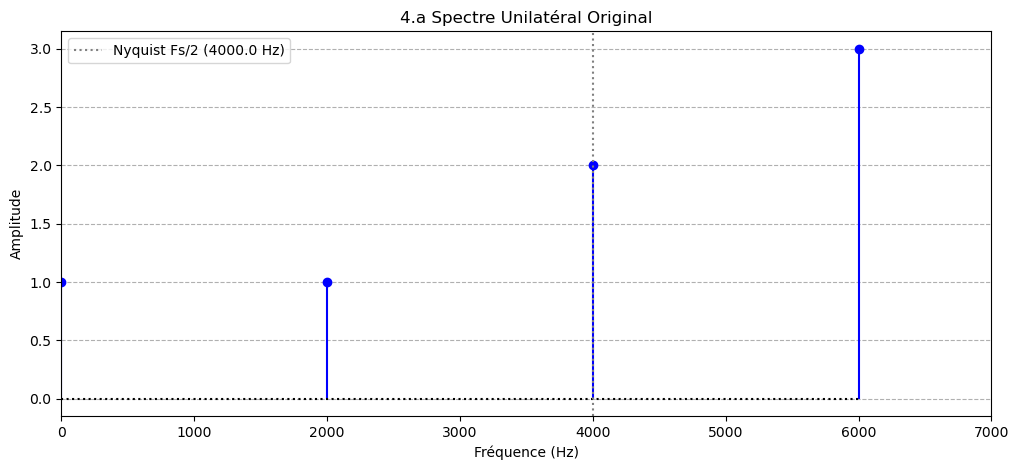

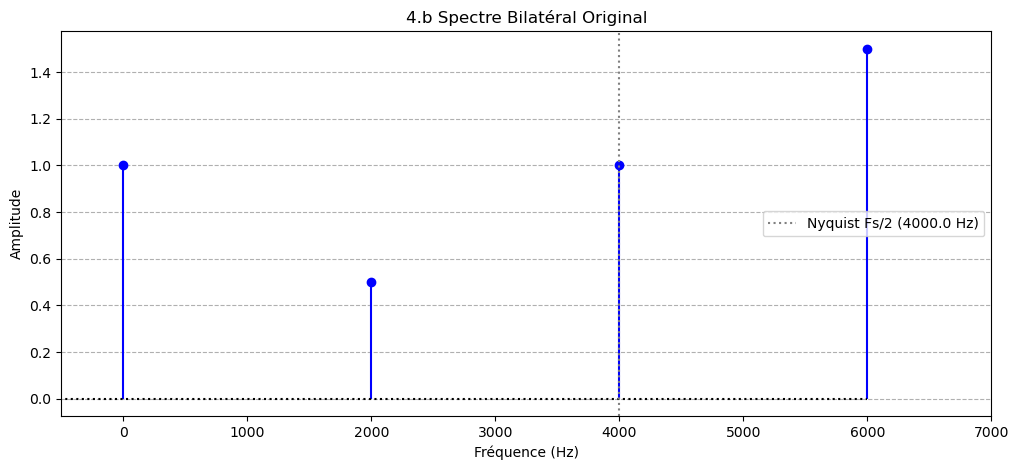

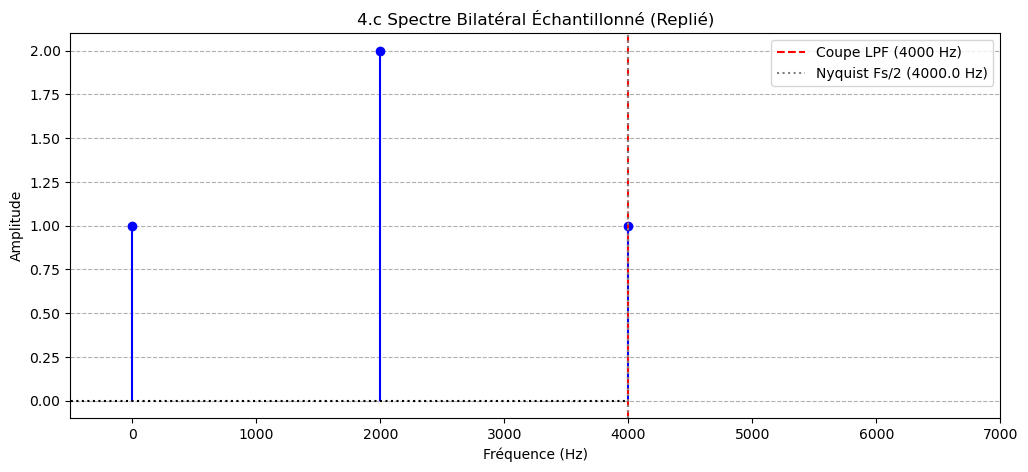


--- Analyse de l'Aliasing (4.e) ---
Fréquence de Nyquist (Fs/2) : 4000.0 Hz
La composante de 6000 Hz est repliée (aliasée) à 2000 Hz.


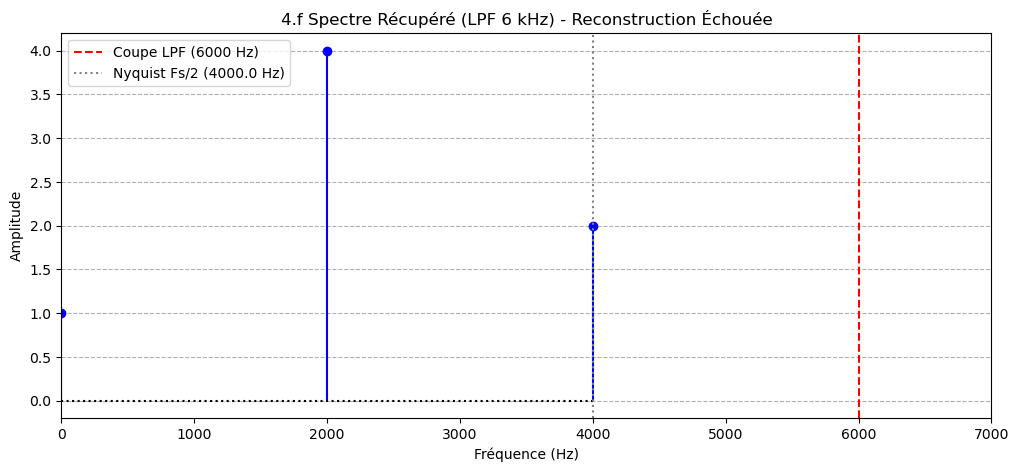


--- Proposition de Filtre (4.g) ---
Pour récupérer le signal original SANS distorsion (aliasing) :
- Augmenter la fréquence d'échantillonnage (Fs) à Fs > 2 * Fmax = 2 * 6000 Hz, soit Fs > 12000 Hz.
- OU appliquer un filtre Anti-Repliement (Anti-Aliasing) sur x(t) avant l'échantillonnage, coupant à Fs/2 = 4000 Hz.
Dans la situation actuelle (Fs=8kHz), la récupération parfaite est impossible.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(frequencies, amplitudes, title, x_limit=10000, is_bilateral=False, cutoff=None):
    plt.figure(figsize=(12, 5))
    # Ajustement des marqueurs pour les raies
    if is_bilateral:
        plt.stem(frequencies, amplitudes, linefmt='b', markerfmt='bo', basefmt='k:')
    else:
        plt.stem(frequencies, amplitudes, linefmt='b', markerfmt='bo', basefmt='k:')

    # Marquage de Fs/2 et du cutoff
    if cutoff is not None:
        plt.axvline(cutoff, color='red', linestyle='--', label=f'Coupe LPF ({cutoff} Hz)')
    
    # Marquage de la fréquence de Nyquist (Fs/2)
    fs_nyquist = 8000 / 2
    if fs_nyquist < x_limit:
        plt.axvline(fs_nyquist, color='gray', linestyle=':', label=f'Nyquist Fs/2 ({fs_nyquist} Hz)')

    plt.title(title)
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True, axis='y', linestyle='--')
    plt.xlim(-500 if is_bilateral else 0, x_limit)
    if cutoff is not None or fs_nyquist < x_limit:
        plt.legend()
    plt.show()

# Définition des composantes
fs = 8000
freqs_orig = [0, 2000, 4000, 6000] # F0 (DC), F1, F2, F3
amps_orig = [1, 1, 2, 3] # A0, A1, A2, A3
f_nyquist = fs / 2 # 4000 Hz

# --- a. et b. Spectre unilatéral et bilatéral original ---
# a. Spectre Unilatéral (Déjà défini par freqs_orig et amps_orig)
plot_spectrum(freqs_orig, amps_orig, "4.a Spectre Unilatéral Original", x_limit=7000)

# b. Spectre Bilatéral original (Amplitudes / 2 pour f != 0, et ajout des fréquences négatives)
bi_freqs = []
bi_amps = []
for f, a in zip(freqs_orig, amps_orig):
    if f == 0:
        bi_freqs.append(0); bi_amps.append(a) # DC non divisé
    else:
        bi_freqs.extend([f, -f]); bi_amps.extend([a/2, a/2]) # Fréquences positives et négatives
        
plot_spectrum(bi_freqs, bi_amps, "4.b Spectre Bilatéral Original", x_limit=7000, is_bilateral=True)


# --- c. et d. Spectre échantillonné et conclusion ---
# Détermination des fréquences d'aliasing (détail pour e.)
# Seul F3=6000 Hz est > Fs/2 = 4000 Hz. Elle est aliasée à |6000 - 8000| = 2000 Hz.

# f_alias = 2000 Hz (avec amplitude de A3=3)
# F_2000_Hz_totale = A1 + A3 = 1 + 3 = 4

# Fréquences dans l'intervalle [-Fs/2, Fs/2] ou [0, Fs/2]
f_reconstruites = [0, 2000, 4000]
a_reconstruites = [1, 4, 2] # 1(DC), 4(2kHz+6kHz aliase), 2(4kHz)

# c. Spectre bilatéral du signal échantillonné (zone principale)
sampled_bi_freqs = []
sampled_bi_amps = []
for f, a in zip(f_reconstruites, a_reconstruites):
    if f == 0:
        sampled_bi_freqs.append(0); sampled_bi_amps.append(a)
    else:
        sampled_bi_freqs.extend([f, -f]); sampled_bi_amps.extend([a/2, a/2])

plot_spectrum(sampled_bi_freqs, sampled_bi_amps, "4.c Spectre Bilatéral Échantillonné (Replié)", x_limit=7000, is_bilateral=True, cutoff=4000)


# --- e. Fréquences d'aliasing ---
print("\n--- Analyse de l'Aliasing (4.e) ---")
print(f"Fréquence de Nyquist (Fs/2) : {f_nyquist} Hz")

aliased_freqs = []
for f_orig in freqs_orig:
    if f_orig > f_nyquist:
        f_alias = abs(f_orig - fs)
        aliased_freqs.append((f_orig, f_alias))
        print(f"La composante de {f_orig} Hz est repliée (aliasée) à {f_alias} Hz.")

if not aliased_freqs:
    print("Aucune fréquence d'aliasing n'a été détectée.")


# --- f. Récupération avec LPF 6 kHz ---
f_cutoff_recov = 6000 
# Le LPF de 6 kHz laisse passer toutes les fréquences non aliasées (0, 2000, 4000, 6000 Hz).
# MAIS, le 6000 Hz original est déjà transformé en 2000 Hz après échantillonnage.
# Le filtre LPF ne PEUT PAS annuler l'aliasing une fois qu'il est produit.

# Le spectre du signal récupéré est identique à celui de 4.c (jusqu'à 6 kHz, mais rien de nouveau)
recov_f = [f for f in f_reconstruites if f <= f_cutoff_recov]
recov_a = [a for f, a in zip(f_reconstruites, a_reconstruites) if f <= f_cutoff_recov]

# On trace juste le spectre positif dans la zone d'intérêt du LPF (0 à 6 kHz)
plot_spectrum(recov_f, recov_a, f"4.f Spectre Récupéré (LPF 6 kHz) - Reconstruction Échouée", x_limit=7000, cutoff=f_cutoff_recov)


# --- g. Proposer un filtre pour récupérer le signal original ---
print("\n--- Proposition de Filtre (4.g) ---")
# 1. Le critère de Nyquist n'est pas respecté (Fmax=6000 Hz, Fs/2=4000 Hz).
# 2. Le 6000 Hz est perdu (transformé en 2000 Hz).
# Pour récupérer le signal original x(t), il FAUT :
print("Pour récupérer le signal original SANS distorsion (aliasing) :")
print(f"- Augmenter la fréquence d'échantillonnage (Fs) à Fs > 2 * Fmax = 2 * 6000 Hz, soit Fs > 12000 Hz.")
print(f"- OU appliquer un filtre Anti-Repliement (Anti-Aliasing) sur x(t) avant l'échantillonnage, coupant à Fs/2 = 4000 Hz.")
print("Dans la situation actuelle (Fs=8kHz), la récupération parfaite est impossible.")